<a href="https://colab.research.google.com/github/IISC-ICAIML-Project/Covid-19-Mortality-Prediction/blob/data_imbalance_resampling/Covid_19_Mortality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the tools

pandas, numpy and matplotlib for data analysis and manipulation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Models from Scikit learn

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay 


## Data Exploration

In [5]:
# load the data into a data frame

df = pd.read_csv('https://github.com/IISC-ICAIML-Porject/Covid-19-Mortality-Prediction/blob/master/data/Covid%20Data.csv?raw=true',header=0)

In [6]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [7]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [8]:
df.shape

(1048575, 21)

### Data analysis and Understanding

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of **21 unique features** and **1,048,576 unique patients**. In the Boolean features, **1** means **"yes"** and **2** means **"no"**. values as **97** and **99** are **missing data**.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## Data Cleaning

We find the total number of missing values in each of the 21 features and corresponding percentage of missing value contributed by each of these features

In [9]:
df_reduced = df.copy()
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
missing_counts = df_reduced.isnull().sum()
invalid_counts = df_reduced.isin([97, 98, 99]).sum()
total_missing_counts = missing_counts + invalid_counts
perc_missing_values = round(total_missing_counts / len(df) * 100, 2)
missing_df = pd.DataFrame({'Feature': df_reduced.columns, 'NaN_count': missing_counts, '97_98_99_count': invalid_counts, 'Total_missing_count': total_missing_counts, 'Percentage_missing': perc_missing_values})
missing_df = missing_df.sort_values(by='Percentage_missing', ascending=False)

print(missing_df)

                                   Feature  NaN_count  97_98_99_count  \
ICU                                    ICU     856032               0   
INTUBED                            INTUBED     855869               0   
PREGNANT                          PREGNANT     527265               0   
PNEUMONIA                        PNEUMONIA      16003               0   
OTHER_DISEASE                OTHER_DISEASE       5045               0   
INMSUPR                            INMSUPR       3404               0   
DIABETES                          DIABETES       3338               0   
TOBACCO                            TOBACCO       3220               0   
HIPERTENSION                  HIPERTENSION       3104               0   
RENAL_CHRONIC                RENAL_CHRONIC       3006               0   
OBESITY                            OBESITY       3032               0   
CARDIOVASCULAR              CARDIOVASCULAR       3076               0   
COPD                                  COPD       30

New copy of the original dataframe is created . We get the count of unique values present in each column 

In [10]:
df_copy = df.copy()
df_copy.shape

for i in df.columns:
 print(df[i].value_counts())
 print('\n')

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

### PREGNANT column cleaning

As Men cannot be PREGNANT, we convert all the 97(missing values) to 2(No) for all row values with SEX = 2(MALE) 

In [11]:
# replace all the missing values from PREGNANT column if Gender is MALE
df_copy.loc[(df_copy.SEX == 2) & (df_copy.PREGNANT == 97), "PREGNANT"] = df_copy["PREGNANT"].replace(97, 2)

df_copy[(df_copy.SEX == 2)]["PREGNANT"]

1          2
2          2
4          2
11         2
12         2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: PREGNANT, Length: 523511, dtype: int64

### CLASIFICATION_FINAL column cleaning

Consider the column CLASIFICATION_FINAL which describes if the patient is tested positive for Covid or was the test inconclusive.

For values >=4 i.e. 4,5,6,7 , the test is either negative or inconclusive, hence, we will replace it with 0("NO") 

For Values 1,2,3 the covid test is Positive, hence, we will replace it with 1("YES")

In [12]:
# Consider CLASSIFICATION column , replace all values >4 with 2("NO") since covid test is inconclusive 
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 4), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([4,5,6,7], 0)

print("Repacing 4,5,6,7 with 0 since covid test is inconclusive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

# Consider all values in [1,2,3] as tested positive for Covid-19 Virus
df_copy.loc[(df_copy.CLASIFFICATION_FINAL >= 1), "CLASIFFICATION_FINAL"] = df_copy["CLASIFFICATION_FINAL"].replace([1,2,3], 1)

print("Repacing 1,2,3 with 1 since covid test is Positive\n",df_copy['CLASIFFICATION_FINAL'].value_counts())

Repacing 4,5,6,7 with 0 since covid test is inconclusive
 0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64
Repacing 1,2,3 with 1 since covid test is Positive
 0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64


### Basic Feature Selection

We filter out the columns which do not give us useful information 

MEDICAL_UNIT - no useful info can be got since it is not known what the enumerations {1, 2, ... 12, 13} mean.

ICU  and INTUBATED - Too many missing values.

In [13]:
Filtered_Cols=['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','PREGNANT']

df_reduced=df_copy[Filtered_Cols].copy()

In [14]:
# The shape of data frame after considering the filled values from different columns
original_number_of_datapoints = df_reduced.shape
df_reduced = df_reduced.replace([97, 98, 99], np.nan)
df_reduced=df_reduced.dropna(axis=0)
print(df_reduced.head(),"\n",df_reduced.shape,original_number_of_datapoints)

   USMER  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA   AGE  DIABETES  COPD  \
0      2    1             1  03/05/2020        1.0  65.0       2.0   2.0   
1      2    2             1  03/06/2020        1.0  72.0       2.0   2.0   
2      2    2             2  09/06/2020        2.0  55.0       1.0   2.0   
3      2    1             1  12/06/2020        2.0  53.0       2.0   2.0   
4      2    2             1  21/06/2020        2.0  68.0       1.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0      2.0           1.0            2.0             2.0      1.0   
2     2.0      2.0           2.0            2.0             2.0      2.0   
3     2.0      2.0           2.0            2.0             2.0      2.0   
4     2.0      2.0           1.0            2.0             2.0      2.0   

   RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  PREGNANT  
0            2.0      2.0 

### Target Cleaning

In [15]:
# "In data set 9999-99-99 indicates person is not died, so replacing these values with 0. Persons who really died has values 03-03-2020 format. So replacing data format values with 1. So 0 means died, 1 means not died in DATE_DIED column

df_reduced["DATE_DIED"] = [0 if each=="9999-99-99" else 1 for each in df_reduced.DATE_DIED]

In [16]:
for i in df_reduced.columns:
 print(df_reduced[i].value_counts())
 print('\n')

2    655933
1    365722
Name: USMER, dtype: int64


2    511795
1    509860
Name: SEX, dtype: int64


1    830233
2    191422
Name: PATIENT_TYPE, dtype: int64


0    947100
1     74555
Name: DATE_DIED, dtype: int64


2.0    884402
1.0    137253
Name: PNEUMONIA, dtype: int64


30.0     26456
31.0     25419
28.0     24735
29.0     24595
34.0     24406
         ...  
115.0        2
119.0        2
111.0        1
121.0        1
113.0        1
Name: AGE, Length: 118, dtype: int64


2.0    899531
1.0    122124
Name: DIABETES, dtype: int64


2.0    1007356
1.0      14299
Name: COPD, dtype: int64


2.0    991243
1.0     30412
Name: ASTHMA, dtype: int64


2.0    1008105
1.0      13550
Name: INMSUPR, dtype: int64


2.0    862521
1.0    159134
Name: HIPERTENSION, dtype: int64


2.0    994597
1.0     27058
Name: OTHER_DISEASE, dtype: int64


2.0    1001613
1.0      20042
Name: CARDIOVASCULAR, dtype: int64


2.0    865081
1.0    156574
Name: OBESITY, dtype: int64


2.0    1003350
1.0      18305
Name

In [17]:
num_died = (df_reduced['DATE_DIED'] == 1).sum()
num_not_died = (df_reduced['DATE_DIED'] == 0).sum()
perc_died = num_died / len(df_reduced) * 100
perc_not_died = num_not_died / len(df_reduced) * 100

# Print the results
print("Number of people who died:", num_died)
print("Number of people who did not die:", num_not_died)
print("Percentage of people who died:", perc_died, "%")
print("Percentage of people who did not die:", perc_not_died, "%")

Number of people who died: 74555
Number of people who did not die: 947100
Percentage of people who died: 7.2974732174755665 %
Percentage of people who did not die: 92.70252678252443 %


### PATIENT_TYPE Column cleaning

Consider the column 'PATIENT_TYPE' . 

It describes whether the patient returned home (1) or hosptialized (2) 
we will change the feature name to Hospitalized and have Yes as 1 No as 0

In [18]:
df_reduced.loc[(df_reduced.PATIENT_TYPE == 1), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(1, 0)
df_reduced.loc[(df_reduced.PATIENT_TYPE == 2), "PATIENT_TYPE"] = df_reduced["PATIENT_TYPE"].replace(2, 1)

### Convert to Binary Feature Vectors

Convert all 2(No) and 1(Yes) Values to binary  0(No) and 1(Yes)

In [19]:
df_final = df_reduced.copy()
for col in df_final.columns:
  df_final = df_final.replace(2,0)

df_final = df_final.astype(int)
df_final

,USMER,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,PREGNANT
0,0,1,0,1,1,65,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,1,72,0,0,0,0,1,0,0,1,1,0,0,0
2,0,0,1,1,0,55,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,53,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,68,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0
1048571,1,0,1,0,0,51,0,0,0,0,1,0,0,0,0,0,0,0
1048572,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0
1048573,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0


### Applying one hot encoding to AGE and SEX Columns



In [20]:
age_bins = [0, 20, 40, 60, 80, 100, 120]
age_labels = ['0-20', '20-40', '40-60', '60-80','80-100','100-120']
df_final['AGE_GROUP'] = pd.cut(df_final['AGE'], bins=age_bins, labels=age_labels)

# Apply one hot encoding using pd.get_dummies()
one_hot_encoded = pd.get_dummies(df_final['AGE_GROUP'], prefix='AGE')

# Concatenate the original dataframe with the one hot encoded dataframe
df_final = pd.concat([df_final, one_hot_encoded], axis=1)

# Drop the original "AGE" and "AGE_GROUP" columns
df_final.drop(['AGE', 'AGE_GROUP'], axis=1, inplace=True)

gender_one_hot = pd.get_dummies(df_final['SEX'], prefix='GENDER', prefix_sep='')
df_final = pd.concat([df_final, gender_one_hot], axis=1)
df_final.drop(['SEX'], axis=1, inplace=True)

df_final = df_final.rename(columns={'PATIENT_TYPE':'HOSPITALIZED', 'DATE_DIED':'DEATH','CLASIFFICATION_FINAL':'COVID-TEST','GENDER0':'MALE','GENDER1':'FEMALE'})


In [21]:
df_final.head()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [22]:
df_final1 = df_final.astype(bool)
df_final1

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
0,False,False,True,True,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
1,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,False,True,True,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1048571,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1048572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1048573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [23]:
df_final.corr()

,USMER,HOSPITALIZED,DEATH,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,COVID-TEST,PREGNANT,AGE_0-20,AGE_20-40,AGE_40-60,AGE_60-80,AGE_80-100,AGE_100-120,MALE,FEMALE
USMER,1.000000,0.188569,0.118898,0.151182,0.058638,0.024148,0.010842,0.014644,0.055542,0.022710,...,0.029196,-0.001634,-0.016074,-0.037482,-0.001464,0.054712,0.032829,-0.001122,0.002906,-0.002906
HOSPITALIZED,0.188569,1.000000,0.520051,0.652446,0.257258,0.115219,-0.013508,0.091178,0.233759,0.091659,...,0.191218,0.009654,-0.040937,-0.253240,0.031620,0.293951,0.151943,0.001133,0.089349,-0.089349
DEATH,0.118898,0.520051,1.000000,0.470852,0.217246,0.089427,-0.017257,0.049318,0.205149,0.057079,...,0.193828,-0.021052,-0.064301,-0.202093,0.006635,0.287538,0.154357,0.000694,0.080420,-0.080420
PNEUMONIA,0.151182,0.652446,0.470852,1.000000,0.216320,0.092748,-0.010516,0.062941,0.191538,0.054196,...,0.192608,-0.014912,-0.055640,-0.200321,0.037100,0.240051,0.120368,0.002479,0.079732,-0.079732
DIABETES,0.058638,0.257258,0.217246,0.216320,1.000000,0.095998,0.003776,0.053520,0.377840,0.032462,...,0.094577,-0.024625,-0.090611,-0.241987,0.105120,0.260172,0.071545,-0.001843,0.010918,-0.010918
COPD,0.024148,0.115219,0.089427,0.092748,0.095998,1.000000,0.035857,0.054652,0.116258,0.036183,...,0.010698,-0.008282,-0.028216,-0.085928,-0.020942,0.128765,0.140410,0.000971,0.002899,-0.002899
ASTHMA,0.010842,-0.013508,-0.017257,-0.010516,0.003776,0.035857,1.000000,0.021329,0.016232,0.013722,...,-0.014458,-0.001281,0.013386,0.013784,-0.005539,-0.017743,-0.008019,-0.001397,-0.044623,0.044623
INMSUPR,0.014644,0.091178,0.049318,0.062941,0.053520,0.054652,0.021329,1.000000,0.045336,0.126188,...,-0.007440,-0.001666,0.018053,-0.042577,0.001322,0.040263,0.017026,0.001847,-0.007219,0.007219
HIPERTENSION,0.055542,0.233759,0.205149,0.191538,0.377840,0.116258,0.016232,0.045336,1.000000,0.049815,...,0.087107,-0.030661,-0.107321,-0.266550,0.099002,0.294519,0.135535,-0.000531,0.003003,-0.003003
OTHER_DISEASE,0.022710,0.091659,0.057079,0.054196,0.032462,0.036183,0.013722,0.126188,0.049815,1.000000,...,-0.004183,0.014273,0.006857,-0.042007,0.002127,0.037392,0.031946,-0.001254,-0.023159,0.023159


# Data Preparation for Model training

In [24]:
# get 3 sets of data - train , val , test

X = df_final.drop("DEATH", axis=1)
y = df_final["DEATH"]

# this split gives 2 sets for training and final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# this split gives 2 sets for model training and model validation - hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, X_val.shape, X_test.shape)

(572126, 23) (143032, 23) (306497, 23)


In [25]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(0    530592
 1     41534
 Name: DEATH, dtype: int64,
 0    132557
 1     10475
 Name: DEATH, dtype: int64,
 0    283951
 1     22546
 Name: DEATH, dtype: int64)

Henceforth , we will only use X_train and X_val for hyperparameter tuning.
X_test will be reserved only for perfomrance metrics of the final model.

## Feature Extraction 

PCA !!! 
LDA ???

## Resolving Data Imbalance

### SMOTE Method from imblearn

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [27]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.6)
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

print(X_train_SMOTE.shape)

(848947, 23)


In [28]:
print(y_train_SMOTE.value_counts())

0    530592
1    318355
Name: DEATH, dtype: int64


In [29]:
X_train_SMOTE, y_train_SMOTE = shuffle(X_train_SMOTE, y_train_SMOTE, random_state=2023)

### Resample from Sklearn

In [30]:
from sklearn.utils import resample

In [31]:
X_train_minority_resampled, y_train_minority_resampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                    n_samples=round(0.5*X_train[y_train == 0].shape[0]),
                                    replace=True,
                                    random_state=2023)

X_train_resampled = pd.concat([X_train_minority_resampled, X_train])
y_train_resampled = pd.concat([y_train_minority_resampled, y_train])

In [32]:
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=2023)

In [33]:
print(X_train_resampled.shape)
print(y_train_resampled.value_counts())

(837422, 23)
0    530592
1    306830
Name: DEATH, dtype: int64


### Naive dupliction

In [34]:
from sklearn.utils import shuffle

In [35]:
# create a new DataFrame that is a copy of the rows with a value of 1, repeated three times
ones_df = pd.concat([y_train[y_train == 1]] * 6, axis=0)
X_ones = pd.concat([X_train[y_train == 1]] * 6, axis=0)

# concatenate the original DataFrame with the new DataFrame
X_train_balanced = pd.concat([X_train, X_ones])
y_train_balanced = pd.concat([y_train, ones_df])

# shuffle the rows in the new DataFrame
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=2023)

In [36]:
print(X_train_balanced.shape)
print(y_train_balanced.value_counts())

(821330, 23)
0    530592
1    290738
Name: DEATH, dtype: int64


## Modeling

### Out of the Box Models

#### Classifier- Classifier Ensemble 

We have used 2 weak learners : 2 Decision trees 

One DT would learn the positive samples and the other would learn only negative samples. This is called Positive unnbalanced model

These 2 overfitted models would be used in a voting classifer which would consider the majority between the 2 models to classify a sample to either positive class or a negative class

Note : Without oversampling or undersampling , with a high imbalance ratio of 93:7, we are still able to get a descent f1 scoring on the validation set of 93.4%  

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# separate positive and negative samples
X_train_pos = X_train[y_train == 0]
y_train_pos = y_train[y_train == 0]
X_train_neg = X_train[y_train == 1]
y_train_neg = y_train[y_train == 1]
# Define individual classifiers
clf1 = make_pipeline(DecisionTreeClassifier(random_state=42))
clf2 = make_pipeline(DecisionTreeClassifier(random_state=42))

# Fit classifiers on masked data
clf1.fit(X_train_pos, y_train_pos)
clf2.fit(X_train_neg, y_train_neg)

# Define parameter grid for grid search
param_grid = {
    'voting': ['hard', 'soft'],
    'weights': [[1, 1], [2, 1], [1, 2]]
}

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('clf1', clf1),
    ('clf2', clf2)
])

# Define the grid search object
grid_search = GridSearchCV(
    ensemble_model,
    param_grid=param_grid,
    cv=5,
    scoring="f1"
)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and print its accuracy
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_val, y_val)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9348117903685889


In [46]:
print("Best estimator:",best_model)
pd.DataFrame(grid_search.cv_results_)

Best estimator: VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('decisiontreeclassifier',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('clf2',
                              Pipeline(steps=[('decisiontreeclassifier',
                                               DecisionTreeClassifier(random_state=42))]))],
                 weights=[1, 1])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.381792,1.161951,1.487770,0.652163,hard,"[1, 1]","{'voting': 'hard', 'weights': [1, 1]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1
1,3.339197,0.201105,1.142585,0.308281,hard,"[2, 1]","{'voting': 'hard', 'weights': [2, 1]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1
2,3.534541,0.443523,0.931601,0.012790,hard,"[1, 2]","{'voting': 'hard', 'weights': [1, 2]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1
3,3.544571,0.481081,0.120793,0.018393,soft,"[1, 1]","{'voting': 'soft', 'weights': [1, 1]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1
4,3.629960,0.331206,0.118305,0.017317,soft,"[2, 1]","{'voting': 'soft', 'weights': [2, 1]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1
5,3.327636,0.180625,0.119431,0.018833,soft,"[1, 2]","{'voting': 'soft', 'weights': [1, 2]}",0.445073,0.445728,0.458607,0.452927,0.448322,0.450131,0.005058,1


#### GMM - Classifier Ensemble

In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

# Define your custom model
class GMMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_components=1, covariance_type='full', tol=1e-3,
                 reg_covar=1e-6, max_iter=100, n_init=1, init_params='kmeans',
                 weights_init=None, means_init=None, precisions_init=None,
                 random_state=None, warm_start=False, verbose=0,
                 verbose_interval=10):
        self.n_components = n_components
        self.covariance_type = covariance_type
        self.tol = tol
        self.reg_covar = reg_covar
        self.max_iter = max_iter
        self.n_init = n_init
        self.init_params = init_params
        self.weights_init = weights_init
        self.means_init = means_init
        self.precisions_init = precisions_init
        self.random_state = random_state
        self.warm_start = warm_start
        self.verbose = verbose
        self.verbose_interval = verbose_interval
        self.gmm = GaussianMixture(n_components=self.n_components,
                                   covariance_type=self.covariance_type,
                                   tol=self.tol,
                                   reg_covar=self.reg_covar,
                                   max_iter=self.max_iter,
                                   n_init=self.n_init,
                                   init_params=self.init_params,
                                   weights_init=self.weights_init,
                                   means_init=self.means_init,
                                   precisions_init=self.precisions_init,
                                   random_state=self.random_state,
                                   warm_start=self.warm_start,
                                   verbose=self.verbose,
                                   verbose_interval=self.verbose_interval)

    def fit(self, X, y=None):
        self.gmm.fit(X)
        return self

    def predict(self, X):
        y_pred = self.gmm.predict(X)
        return y_pred

# Train the GMM on negative samples only
n_components_range = range(1, 22) # Range of values for n_components
lowest_bic = np.infty
best_gmm = None
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_train_neg)
    bic = gmm.bic(X_train_neg)
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm
print(f"Best n_components for GMM: {best_gmm.n_components}")

X_train_pos_neg = pd.concat([X_train_pos, X_train_neg.sample(frac=0.02, random_state=2023)])
y_train_pos_neg = pd.concat([y_train_pos, y_train_neg.sample(frac=0.02, random_state=2023)])
# Train the Logistic Regression model on positive samples only
lr = LogisticRegression()
lr.fit(X_train_pos_neg, y_train_pos_neg)


best_gmm_clf = GMMClassifier(best_gmm.n_components)


# Combine the models using a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ("lr", lr),
    ("gmm", best_gmm_clf)
], voting="soft")
voting_clf.fit(X, y)

# Predict on test samples
y_pred = voting_clf.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f1)

Best n_components for GMM: 21


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: ignored

We have chosen 3 ML models for hyper parameter tuning and model selection
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the pipeline
pipe = Pipeline([
    ('clf', None),
])

# Define the hyperparameters for each estimator in the pipeline
param_grid = [
    {
        'clf': [LogisticRegression(max_iter = 1000, solver='saga', penalty='l1')],
        # 'clf__penalty': ['l1', 'l2'],
        # 'clf__C': [0.1, 1, 10]
    },
    {
        'clf': [RandomForestClassifier()],
        # 'clf__n_estimators': [50, 100, 200],
        # 'clf__max_depth': [5, 10, 15]
    },
    {
        'clf': [XGBClassifier()],
        # 'clf__learning_rate': [0.1, 0.01, 0.001],
        # 'clf__n_estimators': [50, 100, 200]
    }
]

# Create the grid search object
grid_SMOTE = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5, n_jobs =-1)
grid_resampled = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)
grid_balanced = GridSearchCV(pipe, param_grid, scoring=['f1','accuracy'], refit='f1', cv=5,  n_jobs =-1)

# Fit the grid search to the data
grid_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
grid_resampled.fit(X_train_resampled, y_train_resampled)
grid_balanced.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', None)]), n_jobs=-1,
             param_grid=[{'clf': [LogisticRegression(max_iter=1000,
                                                     penalty='l1',
                                                     solver='saga')]},
                         {'clf': [RandomForestClassifier()]},
                         {'clf': [XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                ena...
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_bin=None,
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=None, ...)]}],
             refit='f1', scoring=['f1', 'accuracy'])

In [54]:
print("Best estimator: ", grid_SMOTE.best_estimator_)
print("Best score: ", grid_SMOTE.best_score_)
pd.DataFrame(grid_SMOTE.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8818519177757607


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,3.581434,0.538133,0.290593,0.130650,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.860292,0.861195,0.859837,0.861228,...,0.000957,3,0.893217,0.893983,0.892923,0.894001,0.895214,0.893868,0.000795,3
1,116.882659,11.443649,6.291739,0.342786,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.882054,0.881195,0.882383,0.881460,...,0.000449,1,0.906519,0.906148,0.906690,0.906336,0.907008,0.906540,0.000296,1
2,192.645323,20.524466,0.895814,0.305960,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.880036,0.878516,0.879642,0.878452,...,0.000628,2,0.904581,0.903886,0.904339,0.903821,0.904710,0.904267,0.000359,2


In [55]:
print("Best estimator: ", grid_resampled.best_estimator_)
print("Best score: ", grid_resampled.best_score_)
pd.DataFrame(grid_resampled.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8821514618107079


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,4.338557,1.057089,0.302571,0.180613,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.856346,0.856945,0.857972,0.856101,...,0.001115,3,0.892968,0.892825,0.893960,0.892318,0.894688,0.893352,0.000854,3
1,110.509135,12.460130,5.400821,0.646187,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.881998,0.881311,0.882203,0.881856,...,0.000686,1,0.908696,0.907616,0.908822,0.908237,0.909723,0.908619,0.000696,1
2,183.471700,28.732769,0.901810,0.338936,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.876492,0.875922,0.877432,0.876475,...,0.000882,2,0.904302,0.903424,0.904720,0.903907,0.905687,0.904408,0.000770,2


In [56]:
print("Best estimator: ", grid_balanced.best_estimator_)
print("Best score: ", grid_balanced.best_score_)
pd.DataFrame(grid_balanced.cv_results_)

Best estimator:  Pipeline(steps=[('clf', RandomForestClassifier())])
Best score:  0.8770801443115055


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,...,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,2.716295,0.587460,0.184176,0.050725,"LogisticRegression(max_iter=1000, solver='newt...","{'clf': LogisticRegression(max_iter=1000, solv...",0.851892,0.852909,0.853443,0.852598,...,0.000503,3,0.892342,0.893790,0.893364,0.893175,0.893844,0.893303,0.000543,3
1,113.175412,7.890014,6.037515,0.508383,RandomForestClassifier(),{'clf': RandomForestClassifier()},0.876545,0.876917,0.877102,0.877382,...,0.000330,1,0.907160,0.908091,0.907428,0.908085,0.908480,0.907849,0.000482,1
2,186.847289,18.719829,0.748719,0.115247,"XGBClassifier(base_score=None, booster=None, c...","{'clf': XGBClassifier(base_score=None, booster...",0.870915,0.871208,0.871410,0.872325,...,0.000688,2,0.902683,0.903620,0.903018,0.903766,0.904781,0.903574,0.000721,2


In [57]:
print(grid_SMOTE.best_estimator_.score(X_val,y_val),"\n",grid_resampled.best_estimator_.score(X_val,y_val),
      "\n", grid_balanced.best_estimator_.score(X_val,y_val))

0.8913320096202249 
 0.8942404496895799 
 0.8966455059007774


In [ ]:
# put models in dictionary

models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9365588187793336,
 'Random Forest': 0.9357953516598069}

## Model Comparision

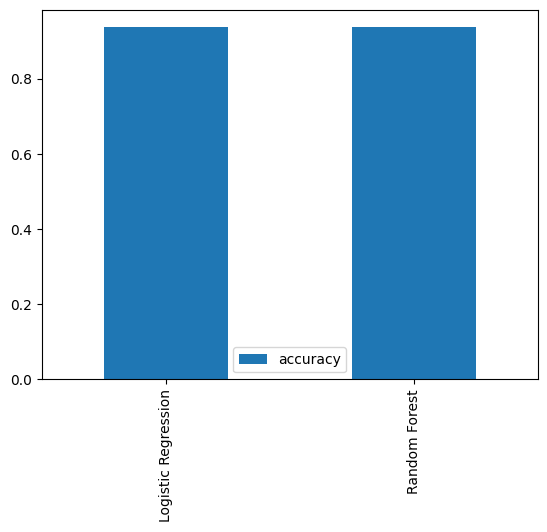

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();